In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
# Constants
BASE_DIR = "./kebap_bosna/"
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 8
EPOCHS = 30

In [51]:
# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load and preprocess data
train_generator = datagen.flow_from_directory(
    BASE_DIR + "train",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = datagen.flow_from_directory(
    BASE_DIR + "validation",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 42 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [52]:
# Model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator)

print(history.history.keys())

Epoch 1/30
6/6 [==============================] - 1s 116ms/step - loss: 0.9099 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/30
6/6 [==============================] - 1s 86ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/30
6/6 [==============================] - 1s 93ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/30
6/6 [==============================] - 1s 88ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/30
6/6 [==============================] - 1s 88ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/30
6/6 [==============================] - 1s 94ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/30
4/6 [===================>..........] - ETA: 0s - loss: 0.6931 - accuracy: 0.5000

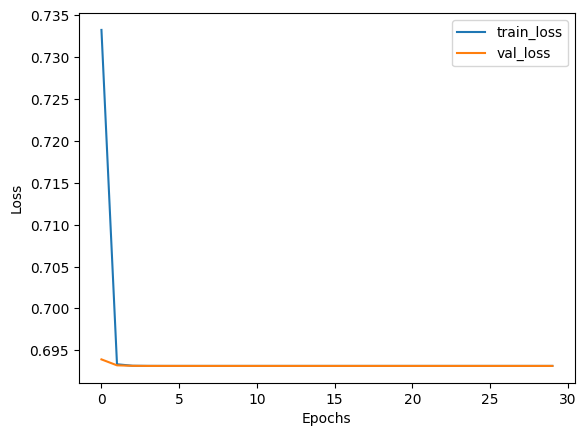

In [ ]:
# Plot loss over iterations
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Found 6 images belonging to 2 classes.


1/1 [==============================] - 0s 285ms/step - loss: 0.6931 - accuracy: 0.3333
Test Loss: 0.693077027797699, Test Accuracy: 0.3333333432674408
1/1 [==============================] - 0s 110ms/step
Confusion Matrix:
[[3 0]
 [2 1]]


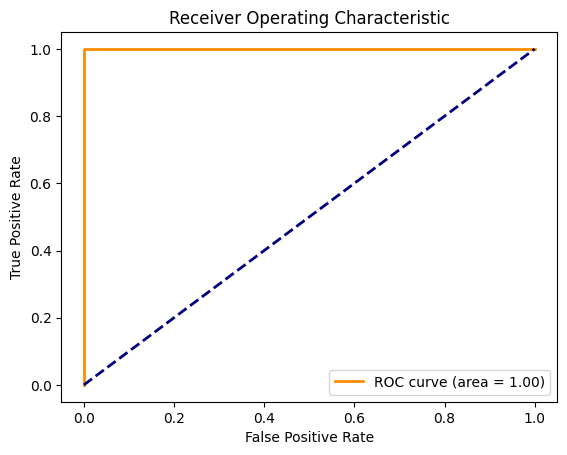

In [ ]:
# Evaluation on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    BASE_DIR + "/test",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Confusion Matrix
predictions = model.predict(test_generator)
conf_matrix = confusion_matrix(test_generator.classes, np.round(predictions))
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve
fpr, tpr, _ = roc_curve(test_generator.classes, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save and load model
model.save('kebap_bosna_classifier.h5')

# Example of running inference
# Load the model
loaded_model = tf.keras.models.load_model('kebap_bosna_classifier.h5')

C:\Users\selln\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Run inference test_generator
scores = loaded_model.evaluate(test_generator)

print("Accuracy: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 0s 154ms/step - loss: 0.6931 - accuracy: 0.3333
Accuracy: 33.33%
